# Word Cloud Code for Coke, Mr. Clean & Budweiser

In [27]:
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

tweets = pd.read_csv('BrandTweets.csv')
tweets['Brand'] = tweets['Brand'].replace(to_replace="Mr.%20Clean",value="Mr. Clean")

### Define Functions for Creating Text & StopWord Sets

In [10]:
def get_brand_text(brand):
    '''Based on brand keyword, return a single string object representing all unique concantenated tweets'''
    brand_subset = tweets[tweets['Brand'] == brand]
    
    # Remove duplicate rows for retweets
    brand_subset = brand_subset.drop_duplicates(subset = 'text')
    
    # Convert to single street object
    brand_tweets = brand_subset['text'].tolist()
    brand_text = ' '.join(brand_tweets)
    
    return brand_text

In [35]:
def get_brand_stops(brand_stops):
    '''Create a consolidated set of global stopwords with brand-specific stop words'''
    commercial_stops = ['\'s','...','\'\'','``','n\'t','https','rt','commercial','super','bowl','superbowl','via','co']
    brand_stops_tot = commercial_stops+brand_stops
    brand_stops_tot = set(brand_stops_tot) # Convert to set
    brand_stops_tot |= STOPWORDS # Add in default stopwords from WorldCloud module
    return brand_stops_tot

## Coca-Cola Word Cloud

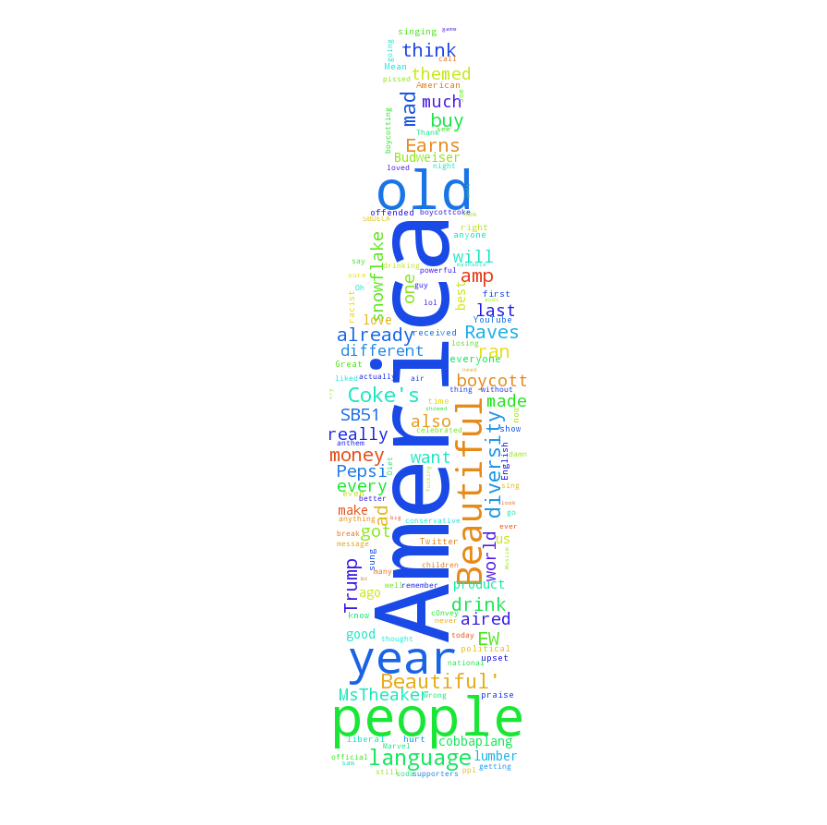

In [36]:
# Convert list of Coke tweets to single string object for processing by Word Cloud module
coke_text = get_brand_text('coke')

# Create consolidated stopwords set for WordCloud module
coke_stops = ['coke','cocacola','coca-cola','coca','cola',"cola's"]
coke_stops_set = get_brand_stops(coke_stops)

# read the mask image
coke_mask = imread("coke_logo_stencil.png")

# Define WordCloud Settings
wc = WordCloud(background_color="white", max_words=2000, mask=coke_mask, scale = 2, min_font_size = 3,stopwords=coke_stops_set)

# generate Word Cloud
wc.generate(coke_text)

# Display Word Cloud
pylab.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wc)
plt.axis("off")
plt.show()

## Mr. Clean Word Cloud

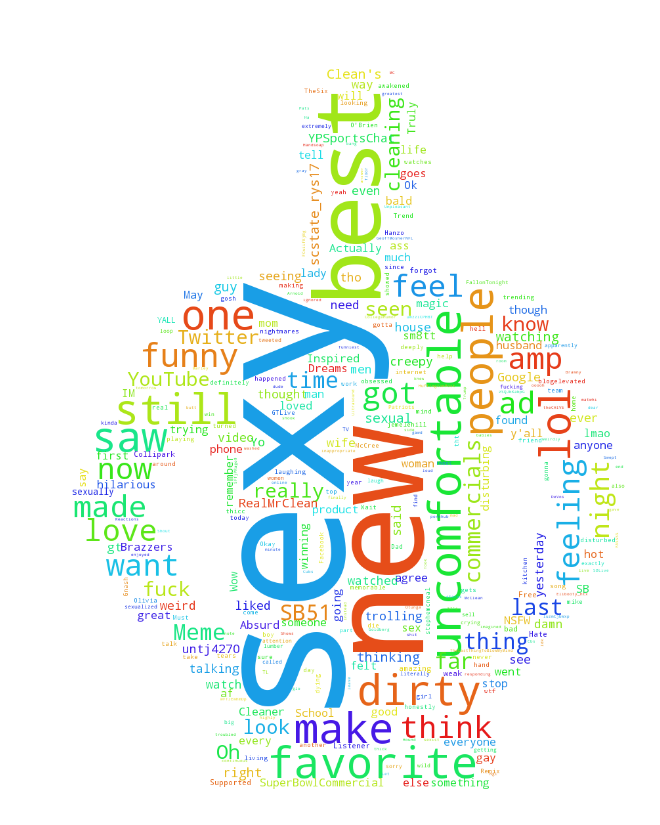

In [37]:
# Convert list of Coke tweets to single string object for processing by Word Cloud module
clean_text = get_brand_text('Mr. Clean')

# Create consolidated stopwords set for WordCloud module
clean_stops = ['clean','mr','mr.','mr.clean','mrclean']
clean_stops_set = get_brand_stops(clean_stops)

# read the mask image
clean_mask = imread("mrclean_stencil.png")

# Define WordCloud Settings
wc = WordCloud(background_color="white", max_words=2000, mask=clean_mask, scale = 2, min_font_size = 3,stopwords=clean_stops_set)

# generate Word Cloud
wc.generate(clean_text)

# Display Word Cloud
pylab.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wc)
plt.axis("off")
plt.show()

## Budweiser Word Cloud

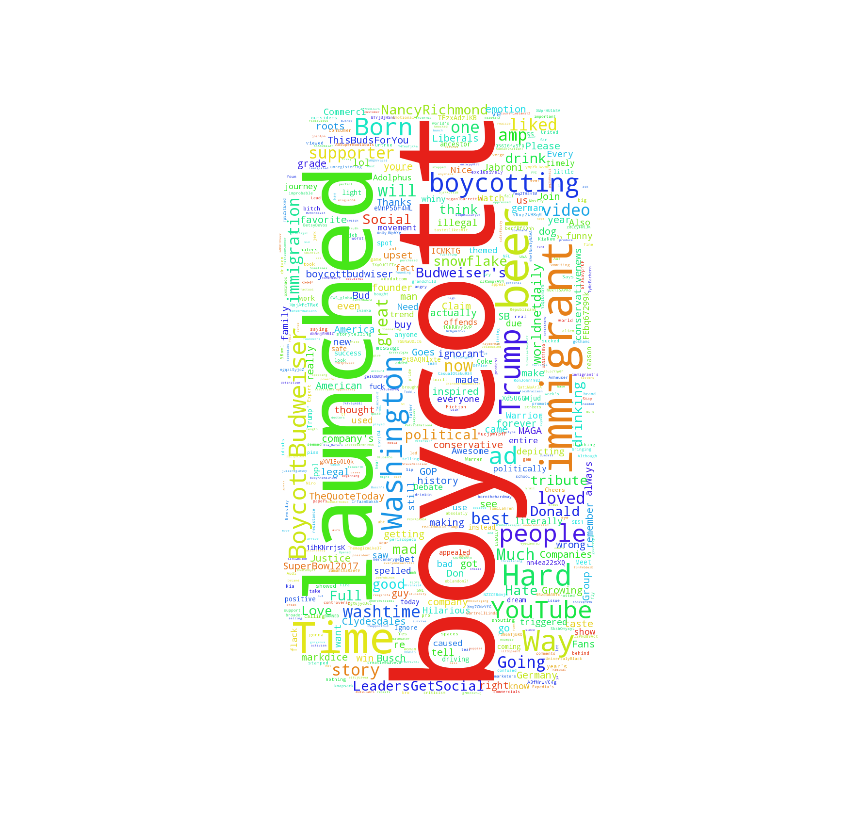

In [40]:
# Convert list of Coke tweets to single string object for processing by Word Cloud module
bud_text = get_brand_text('budweiser')

# Create consolidated stopwords set for WordCloud module
bud_stops = ['budweiser']
bud_stops_set = get_brand_stops(bud_stops)

# read the mask image
bud_mask = imread("bud_stencil.png")

# Define WordCloud Settings
wc = WordCloud(background_color="white", max_words=2000, mask=bud_mask, scale = 2, min_font_size = 3,stopwords=bud_stops_set)

# generate Word Cloud
wc.generate(bud_text)

# Display Word Cloud
pylab.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wc)
plt.axis("off")
plt.show()